# DATA100 GROUP 2 FINAL PROJECT
# PHILIPPINE DENGUE CASES 2016-2020
<a id='PHILIPPINE DENGUE CASES'></a>
This notebook is an exploratory data analysis on the [Philippine Dengue Cases Dataset](https://www.kaggle.com/datasets/vincentgupo/dengue-cases-in-the-philippines). The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [Reading the Dataset](#reading-the-dataset) |
| [Exploratory Data Analysis Questions](#exploratory-data-analysis-questions)|
| [Cleaning the Dataset](#cleaning-the-dataset) |
| [Exploratory Data Analysis](#exploratory-data-analysis) |
| - [Question 1](#question-1-what-is-the-relationship-between-the-facebook-likes-and-the-imdb-score) |
| - [Question 2](#question-2-what-are-the-top-10-movies-based-on-their-profit) |
| - [Question 3](#question-3-which-movie-has-the-highest-imdb-score-per-content-rating) |
| - [Question 4](#question-4-what-numerical-columns-are-most-correlated-to-the-imdb_score) |
| - [Question 5](#question-5-what-are-the-most-common-genres) |
| - [Question 6](#question-6-what-are-the-most-common-combinations-of-genres) |
| - [Question 7](#question-7-what-are-the-most-common-keywords) |
| [Research Question](#possible-research-question) |
| [Clustering the Dataset](#clustering-the-dataset) |
| - [Pre-Processing](#pre-processing) |
| - [KMeans Clustering](#kmeans-clustering) |
| - [Confidence Interval](#confidence-interval)) |
| - [Hypothesis Testing](#hypothesis-testing) |
| [Conclusion](#conclusion) |

## Import
For this notebook, **numpy**, **pandas**, and **matplotlib** must be imported.

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Creeper\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## The Dataset

-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --

`IMDb (Internet Movie Database)` is an **online database** that contains information on a collection of films, television series, video games, and many more. Data such as cast and production crew, plot, ratings, and reviews is compiled on their website for free viewing. This type of documentation can be used to determine a movie based on its content and help users know what to watch, or be a tool to familiarize users with the credits afterwards. 

The `IMDB 5000 Movie Dataset`, taken from **Kaggle**, contains **5000 different movies** from the *IMDb website*. The movies are from the year 1916 to 2016 in more than 50 countries and was compiled and updated in 2018. Data from the website comes from various sources, which include on-screen credits and interviews, and are mostly submitted by people in the industry and its users ([source](https://help.imdb.com/article/imdb/general-information/where-does-the-information-on-imdb-come-from/GGD7NGF5X3ECFKNN?ref_=helpart_nav_26#)). This collection process can affect the data that is not verified by studios and filmmakers, that is why IMDb consistently checks their data for accuracy and reliability. Since Facebook likes are also a part of the dataset, generated conclusions can be outdated.

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 5043 **observations** across 28 **variables**. Each row represents **1 movie**, while columns represent **movie or cast information**. The following are the variables in the dataset and their descriptions:

| Variable Name | Description |
| --- | --- |
| **`color`** | 'Black and White' or 'Color' |
| **`director_name`** | Name of the Director of the Movie |
| **`num_critic_for_reviews`** | Number of critics who reviewed the movie |
| **`duration`** | Duration of movie in minutes |
| **`director_facebook_likes`** | Number of Facebook likes the director has |
| **`actor3_facebook_likes`** | Number of Facebook likes the tertiary actor has |
| **`actor_2_name`** | Name of the secondary actor starring in the movie |
| **`actor_1_facebook_likes`** | Number of Facebook likes the primary actor has | 
| **`gross`** | Gross box office earnings of the movie | 
| **`genres`** | Genres of the movie | 
| **`actor_1_name`** | Name of the primary actor starring in the movie | 
| **`movie_title`** | Title of the movie |
| **`num_voted_users`** | Number of users who rated the movie |
| **`cast_total_facebook_likes`** | Total number of Facebook likes the cast has |
| **`actor_3_name`** | Name of the tertiary actor starring in the movie |
| **`facenumber_in_poster`** | Number of faces in the poster |
| **`plot_keywords`** | Keywords used to describe the plot |
| **`movie_imdb_link`** | Link of the movie in IMDb |
| **`num_user_for_reviews`** | Number of users who reviewed the movie |
| **`language`** | Original language of the movie |
| **`country`** | Country the movie originated from |
| **`content_rating`** | Content classification (PG, SPG, R-13, etc.) |
| **`budget`** | Budget of the movie |
| **`title_year`** | Year the movie was released |
| **`actor_2_facebook_likes`** | Number of Facebook likes that actor 2 has |
| **`imdb_score`** | Score of the movie in IMDb |
| **`aspect_ratio`** | Aspect ration of the movie |
| **`movie_facebook_likes`** | Number of Facebook likes the movie has |

## Reading the Dataset
-- [Return to Table of Contents](#imdb-5000-movie-dataset---csmodel-x23-group-6-project) --

Here we will load the dataset using pandas. This will load the dataset into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [249]:
imdb_df = pd.read_csv('movie_metadata.csv')

The dataset is now loaded in the `imdb_df` variable. `imdb_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

Show the contents of the `DataFrame` which contains 5043 different movies.

In [250]:
pd.set_option('display.max_columns', 30)
imdb_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Display the dataset info using the `info` function.

In [251]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Cleaning the Dataset

-- [Return to Table of Contents](#imdb-5000-movie-dataset---csmodel-x23-group-6-project) --

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

First, we will organize the dataset columns to make it easier to understand. Also, some columns are renamed for shorter accessibility.

In [252]:
imdb_df = imdb_df.loc[:,['movie_title','title_year','movie_imdb_link','movie_facebook_likes','director_name','director_facebook_likes','duration','genres','plot_keywords','content_rating','country','language','gross','budget','color','aspect_ratio','facenumber_in_poster','imdb_score','num_voted_users','num_critic_for_reviews','num_user_for_reviews','cast_total_facebook_likes','actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes','actor_3_name','actor_3_facebook_likes']]
imdb_df.rename(columns={'movie_facebook_likes':'movie_likes','director_facebook_likes':'director_likes','facenumber_in_poster':'face_number','num_voted_users':'voted_users','num_critic_for_reviews':'critic_reviews','num_user_for_reviews':'user_reviews','cast_total_facebook_likes':'cast_likes','actor_1_name':'actor1','actor_1_facebook_likes':'actor1_likes','actor_2_name':'actor2','actor_2_facebook_likes':'actor2_likes','actor_3_name':'actor3','actor_3_facebook_likes':'actor3_likes'}, inplace=True)
imdb_df

,movie_title,title_year,movie_imdb_link,movie_likes,director_name,director_likes,duration,genres,plot_keywords,content_rating,country,language,gross,budget,color,aspect_ratio,face_number,imdb_score,voted_users,critic_reviews,user_reviews,cast_likes,actor1,actor1_likes,actor2,actor2_likes,actor3,actor3_likes
0,Avatar,2009.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,33000,James Cameron,0.0,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,PG-13,USA,English,760505847.0,237000000.0,Color,1.78,0.0,7.9,886204,723.0,3054.0,4834,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0
1,Pirates of the Caribbean: At World's End,2007.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0,Gore Verbinski,563.0,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,PG-13,USA,English,309404152.0,300000000.0,Color,2.35,0.0,7.1,471220,302.0,1238.0,48350,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0
2,Spectre,2015.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,85000,Sam Mendes,0.0,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,PG-13,UK,English,200074175.0,245000000.0,Color,2.35,1.0,6.8,275868,602.0,994.0,11700,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0
3,The Dark Knight Rises,2012.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,164000,Christopher Nolan,22000.0,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,PG-13,USA,English,448130642.0,250000000.0,Color,2.35,0.0,8.5,1144337,813.0,2701.0,106759,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0,Doug Walker,131.0,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.1,8,NaN,NaN,143,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,84,Scott Smith,2.0,87.0,Comedy|Drama,fraud|postal worker|prison|theft|trial,NaN,Canada,English,NaN,NaN,Color,NaN,2.0,7.7,629,1.0,6.0,2283,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,318.0
5039,The Following,NaN,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,32000,NaN,NaN,43.0,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,TV-14,USA,English,NaN,NaN,Color,16.00,1.0,7.5,73839,43.0,359.0,1753,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,319.0
5040,A Plague So Pleasant,2013.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,16,Benjamin Roberds,0.0,76.0,Drama|Horror|Thriller,NaN,NaN,USA,English,NaN,1400.0,Color,NaN,0.0,6.3,38,13.0,3.0,0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,0.0
5041,Shanghai Calling,2012.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,660,Daniel Hsia,0.0,100.0,Comedy|Drama|Romance,NaN,PG-13,USA,English,10443.0,NaN,Color,2.35,5.0,6.3,1255,14.0,9.0,2386,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,489.0


### List of Column names changed:
| Old Name | New Name |
| --- | --- |
| movie_facebook_likes | `movie_likes` |
| director_facebook_likes | `director_likes` | 
| facenumber_in_poster | `face_number` |
| num_voted_users | `voted_users` |
| num_critic_for_reviews | `critic_reviews` |
| num_user_for_reviews | `user_reviews` |
| cast_total_facebook_likes | `cast_likes`|
| actor_1_name | `actor1`|
| actor_1_facebook_likes| `actor1_likes`|
| actor_2_name | `actor2` | 
| actor_2_facebook_likes | `actor2_likes` | 
| actor_3_name | `actor3` |
| actor3_facebook_likes | `actor3_likes`|

We then check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values.

In [253]:
duplicated = imdb_df[imdb_df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])
print(duplicated)

Number of duplicates: 45
                                     movie_title  title_year  \
137                        The Legend of Tarzan       2016.0   
187   The Twilight Saga: Breaking Dawn - Part 2       2012.0   
204                         Godzilla Resurgence       2016.0   
303                                         Pan       2015.0   
389                              Fantastic Four       2015.0   
395                    The Fast and the Furious       2001.0   
590                                    Hercules       2014.0   
656                                Total Recall       1990.0   
794                                The Avengers       2012.0   
1220                                   Unbroken       2014.0   
1305                        Victor Frankenstein       2015.0   
1449                                  From Hell       2001.0   
2169                                Wicker Park       2004.0   
2292                         Death at a Funeral       2007.0   
2472           

As displayed above there are **``45 duplicates``** in the dataset. These can be simply removed by calling the function the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function.

In [254]:
imdb_df = imdb_df.drop_duplicates()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      4998 non-null   object 
 1   title_year       4891 non-null   float64
 2   movie_imdb_link  4998 non-null   object 
 3   movie_likes      4998 non-null   int64  
 4   director_name    4895 non-null   object 
 5   director_likes   4895 non-null   float64
 6   duration         4983 non-null   float64
 7   genres           4998 non-null   object 
 8   plot_keywords    4846 non-null   object 
 9   content_rating   4697 non-null   object 
 10  country          4993 non-null   object 
 11  language         4986 non-null   object 
 12  gross            4124 non-null   float64
 13  budget           4511 non-null   float64
 14  color            4979 non-null   object 
 15  aspect_ratio     4671 non-null   float64
 16  face_number      4985 non-null   float64
 17  imdb_score    

Check which columns have **NaN or Null** values and **count** how many null values each column has.

In [255]:
nan_variables = imdb_df.columns[imdb_df.isna().any()].to_list()
nan_count = imdb_df[nan_variables].isnull().sum()
nan_count

title_year        107
director_name     103
director_likes    103
duration           15
plot_keywords     152
content_rating    301
country             5
language           12
gross             874
budget            487
color              19
aspect_ratio      327
face_number        13
critic_reviews     49
user_reviews       21
actor1              7
actor1_likes        7
actor2             13
actor2_likes       13
actor3             23
actor3_likes       23
dtype: int64

Here is a graph of the amount of null data in each column for better visualization.

<AxesSubplot:>

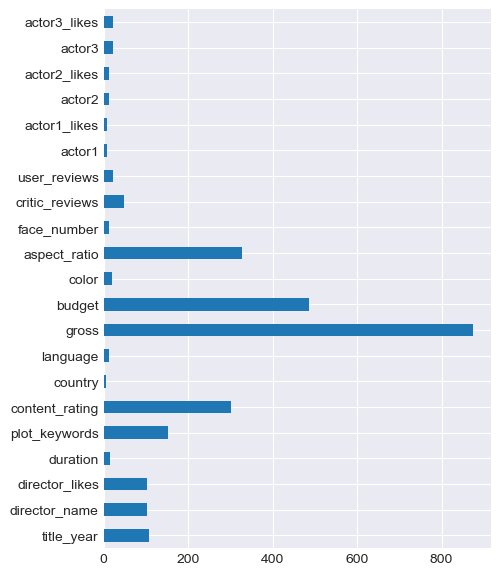

In [256]:
nan_count.plot.barh(figsize=(5,7))

The dataset should first be described for us to know how to handle the NaN values. Here we used the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to get the various details of each column. 

In [257]:
pd.options.mode.chained_assignment = None
imdb_df.describe()

,title_year,movie_likes,director_likes,duration,gross,budget,aspect_ratio,face_number,imdb_score,voted_users,critic_reviews,user_reviews,cast_likes,actor1_likes,actor2_likes,actor3_likes
count,4891.000000,4998.000000,4895.000000,4983.000000,4.124000e+03,4.511000e+03,4671.000000,4985.000000,4998.000000,4.998000e+03,4949.000000,4977.000000,4998.000000,4991.000000,4985.000000,4975.000000
mean,2002.468820,7487.430172,688.679060,107.213325,4.832565e+07,3.974787e+07,2.221417,1.368907,6.441056,8.347020e+04,139.890079,272.014667,9676.941176,6556.939892,1642.998796,639.900905
std,12.475235,19290.726563,2821.649616,25.248775,6.796483e+07,2.069689e+08,1.391185,2.014623,1.124107,1.380866e+05,121.477586,377.776210,18165.404578,15061.586700,4030.925303,1643.298282
min,1916.000000,0.000000,0.000000,7.000000,1.620000e+02,2.180000e+02,1.180000,0.000000,1.600000,5.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,7.000000,93.000000,5.304835e+06,6.000000e+06,1.850000,0.000000,5.800000,8.560000e+03,50.000000,64.000000,1405.500000,611.500000,280.000000,133.000000
50%,2005.000000,162.500000,49.000000,103.000000,2.544575e+07,2.000000e+07,2.350000,1.000000,6.600000,3.426050e+04,110.000000,156.000000,3085.500000,984.000000,595.000000,369.000000
75%,2011.000000,3000.000000,192.000000,118.000000,6.231942e+07,4.500000e+07,2.350000,2.000000,7.200000,9.612075e+04,195.000000,324.000000,13740.500000,11000.000000,917.000000,635.000000
max,2016.000000,349000.000000,23000.000000,511.000000,7.605058e+08,1.221550e+10,16.000000,43.000000,9.500000,1.689764e+06,813.000000,5060.000000,656730.000000,640000.000000,137000.000000,23000.000000


Only columns that will be used for this notebook will be cleaned. Here are the columns to be used in the notebook:
- `gross`
- `budget`
- `director_likes`
- `actor1_likes`
- `actor2_likes`
- `actor3_likes`
- `movie_likes`
- `cast_likes`
- `imdb_score`
- `content_rating`
- `genres`
- `aspect_ratio`
- `face_number`
- `critic_reviews`

NaN values are present in the `gross` and `budget` columns. Since we want to observe these variables for the conclusion, we will delete rows with NaN values using the [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [258]:
imdb_df.dropna(axis = 0, subset=['gross'], inplace=True) 
imdb_df.dropna(axis = 0, subset=['budget'], inplace=True) 
imdb_df.dropna(axis = 0, subset=['aspect_ratio'], inplace=True) 
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      3783 non-null   object 
 1   title_year       3783 non-null   float64
 2   movie_imdb_link  3783 non-null   object 
 3   movie_likes      3783 non-null   int64  
 4   director_name    3783 non-null   object 
 5   director_likes   3783 non-null   float64
 6   duration         3783 non-null   float64
 7   genres           3783 non-null   object 
 8   plot_keywords    3764 non-null   object 
 9   content_rating   3751 non-null   object 
 10  country          3783 non-null   object 
 11  language         3781 non-null   object 
 12  gross            3783 non-null   float64
 13  budget           3783 non-null   float64
 14  color            3781 non-null   object 
 15  aspect_ratio     3783 non-null   float64
 16  face_number      3777 non-null   float64
 17  imdb_score    

Since the missing values on the `director_likes`, `actor1_likes`, `actor2_likes`, `actor3_likes`, and `movie_likes` columns are less than 10% of the total observations, the NaN values will be replaced.

The aforementioned columns also have outliers, so the NaN values in these columns will be replaced with their **median**. 

`aspect_ratio` is more of a flat consistent variable, so its NaN values will be replaced with the **mode** of the column

In [259]:
imdb_df['director_likes'].fillna(imdb_df['director_likes'].median(), inplace=True)
imdb_df['actor1_likes'].fillna(imdb_df['actor1_likes'].median(), inplace=True)
imdb_df['actor2_likes'].fillna(imdb_df['actor2_likes'].median(), inplace=True)
imdb_df['actor3_likes'].fillna(imdb_df['actor3_likes'].median(), inplace=True)
imdb_df['movie_likes'].fillna(imdb_df['movie_likes'].median(), inplace=True)
#Replace 0 with median
imdb_df['director_likes'] = imdb_df['director_likes'].replace([0], imdb_df['director_likes'].median())
imdb_df['actor1_likes'] = imdb_df['actor1_likes'].replace([0], imdb_df['actor1_likes'].median())
imdb_df['actor2_likes'] = imdb_df['actor2_likes'].replace([0], imdb_df['actor2_likes'].median())
imdb_df['actor3_likes'] = imdb_df['actor3_likes'].replace([0], imdb_df['actor3_likes'].median())
imdb_df['movie_likes'] = imdb_df['movie_likes'].replace([0], imdb_df['movie_likes'].median())

imdb_df['face_number'].fillna(imdb_df['face_number'].median(), inplace=True)
imdb_df['critic_reviews'].fillna(imdb_df['critic_reviews'].median(), inplace=True)
imdb_df['aspect_ratio'].fillna(imdb_df['aspect_ratio'].mode(), inplace=True)
imdb_df['plot_keywords'].fillna("none", inplace=True)
imdb_df['language'].fillna("English", inplace=True)
imdb_df['color'].fillna("Color", inplace=True)
imdb_df['actor2'].fillna("none", inplace=True)
imdb_df['actor3'].fillna("none", inplace=True)
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      3783 non-null   object 
 1   title_year       3783 non-null   float64
 2   movie_imdb_link  3783 non-null   object 
 3   movie_likes      3783 non-null   int64  
 4   director_name    3783 non-null   object 
 5   director_likes   3783 non-null   float64
 6   duration         3783 non-null   float64
 7   genres           3783 non-null   object 
 8   plot_keywords    3783 non-null   object 
 9   content_rating   3751 non-null   object 
 10  country          3783 non-null   object 
 11  language         3783 non-null   object 
 12  gross            3783 non-null   float64
 13  budget           3783 non-null   float64
 14  color            3783 non-null   object 
 15  aspect_ratio     3783 non-null   float64
 16  face_number      3783 non-null   float64
 17  imdb_score    

Next we inspect the `imdb_score` column using the function [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [260]:
imdb_df['imdb_score'].value_counts()

6.7    176
6.6    163
6.5    155
6.4    146
6.1    143
      ... 
2.5      1
2.2      1
9.2      1
2.0      1
3.2      1
Name: imdb_score, Length: 74, dtype: int64

Upon inspection, there are *NaN or Null* values nor are there any invalid values or values that are of a different data type. Hence, this column does not need to be cleaned.

Next we create a new column entitled `profit` to easily access the profit of each movie.

In [261]:
imdb_df['profit'] = imdb_df['gross'] - imdb_df['budget']
imdb_df['profit']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
5      -190641321.0
           ...     
5027       663780.0
5029      -905404.0
5033       417760.0
5035      2033920.0
5042        84122.0
Name: profit, Length: 3783, dtype: float64

`content_rating` will also be used in this Exploratory Data Analysis so its values will be inspected.

In [262]:
imdb_df['content_rating'].value_counts()

R            1697
PG-13        1302
PG            566
G              89
Not Rated      35
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

Upon inspection, there are **Null or NaN** values, old content rating labels such as: **M**, **GP**, **X**, **approved**, **not rated**, **passed**, and **unrated**. For this notebook, **MPAA** ratings will be used for the data to be uniformed, hence these labels will be changed to their MPAA counterpart.
- **Null** variables will be removed
- **M** and **GP** ratings will be changed to **PG**
- **X** ratings will be changed to **N-17**
- **Approved**, Not **Rated**, **Unrated**, and **Passed** will be changed to **R**

In [263]:
imdb_df.dropna(axis = 0, subset=['content_rating'], inplace=True) 

imdb_df['content_rating'] = imdb_df['content_rating'].replace(['M'], 'PG')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['GP'], 'PG')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['X'], 'NC-17')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Approved'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Passed'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Not Rated'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Unrated'], 'R')

imdb_df['content_rating'].value_counts()

R        1775
PG-13    1302
PG        569
G          89
NC-17      16
Name: content_rating, dtype: int64

Now that we have cleaned all columns that will be used for this notebook. We can now begin the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#imdb-5000-movie-dataset---csmodel-x23-group-6-project) --


### Question 1: 

### EDA Question 1 Results

# Conclusion

-- [Return to Table of Contents](#imdb-5000-movie-dataset---csmodel-x23-group-6-project) --

Our research question aims to find the variable that the movies in the USA would be grouped by if it is clustered. Using a heatmap to test **our hypothesis** of said variable being *critic_reviews*, with an r value of 0.44, it is found that our null hypothesis is **rejected**. So *critic_reviews* does have an influence to the clustering of the dataset. However, *critic_reviews* was not the most influencial to the clustering. The *gross* variable has the highest correlation with the *cluster* variable, with a value of 0.79, meaning the gross of the movie has the most impact in the clustered data of movies in the USA.